
#PROPOSAL OF QUESTION

"Can Principal Component Analysis (PCA) be used to reduce the dimensionality of this dataset while identifying the most important components related to customer behavior?" By reducing the number of variables, I seek to pinpoint the key features that have the greatest impact on customer metrics like tenure, monthly charges, and service usage patterns. The success of PCA in this context will be judged by its ability to reveal the underlying structure of the data in a meaningful way, without sacrificing critical information. This analysis will assess whether dimensionality reduction via PCA is a suitable strategy for enhancing our understanding of customer behavior, improving computational efficiency, and facilitating better visualization of customer-related insights.



#DEFINED GOAL

By applying PCA, the dataset can be effectively transformed into a smaller number of key components that capture the most critical aspects of customer behavior. This transformation makes the data more manageable, focusing on the essential patterns and removing redundancy, which is particularly useful for datasets with a large number of variables that may overlap in the information they provide. PCA converts the original correlated features into a set of uncorrelated principal components. These components represent the directions of maximum variability in the data and highlight the dominant structures and patterns, which are often hidden in high-dimensional spaces. The benefits of reducing dimensionality are numerous. First, the computational efficiency is significantly improved. With fewer variables, the processing required for subsequent analyses and modeling is faster and less resource-intensive, which is beneficial when working with large datasets. High-dimensional data is inherently challenging to represent visually, but by reducing the data to two or three dimensions, it can be plotted to observe clusters, patterns, or outliers, which may lead to valuable insights about customer behaviors and groupings. Although PCA itself does not determine the exact cause of certain outcomes, such as customer churn, it is a valuable initial step in the data analysis process. It helps highlight the features that are most influential, enabling a more focused approach in subsequent analyses or predictive modeling efforts. By reducing the noise and concentrating on the most impactful components, PCA aids in enhancing the accuracy and interpretability of predictive models, such as those used for predicting customer churn. This makes it a crucial tool for feature extraction and preliminary data exploration, laying the foundation for more detailed analysis and effective decision-making.



###EXPLANATION OF PCA

The process of PCA involves several key steps:

1. The first step in PCA is centering the data by subtracting the mean of each feature from its respective values, ensuring that each variable has a mean of zero. Essentially centering the dataset around the origin and allowing for accurate covariance calculations. Centering the data guarantees that all features contribute equally, preventing those with larger scales from disproportionately impacting the results.

2. Next step, computing the covariance matrix, used to capture relationships between features of the dataset. This matrix helps in identifying the directions in which the dataset exhibits the most variability, allowing for an understanding of the data’s inherent structure.

3. After calculating the covariance matrix, the next step involves finding the eigenvectors and eigenvalues of that matrix. This process is central to identifying the structure within the dataset and understanding how the variability is distributed across the different dimensions. The principal components—formed by projecting the original data along these eigenvector directions—provide a new representation of the dataset in a way that highlights the most critical dimensions of variability. This is the basis for reducing the data to fewer dimensions while retaining its most important features.

4. Next step is to rank the principal components in order of importance based on their corresponding eigenvalues. This ranking process is crucial because it helps identify which components capture the most significant aspects of the data’s variability.

 - Ranking Principal Components: The component with the highest eigenvalue is ranked first, as it captures the largest proportion of the dataset’s variance. Subsequent components, with smaller eigenvalues, capture progressively less variance.

Several techniques are commonly used to determine how many principal components should be retained:

- The elbow rule involves plotting the cumulative variance explained by each principal component in a graph known as a Scree Plot. The point at which the explained variance curve starts to flatten out, forming an "elbow," suggests an appropriate number of components to retain.

- The Kaiser criterion suggests keeping components with eigenvalues greater than 1. This rule is based on the idea that any principal component should contribute more variance than an average original feature, which has a unit variance after standardization. Components with eigenvalues less than 1 contribute less variance and are less valuable in summarizing the dataset.

5. The final step is transforming the original dataset into the new space defined by the selected principal components. The reduced representation simplifies data processing, allowing for easier visualization and analysis, and makes the dataset more manageable for subsequent modeling.

**Expected Outcomes of PCA:**

The expected benefits include:

1. Simplified Data Visualization: Reducing the number of features makes it easier to visualize the data, particularly in two or three dimensions. This visualization can reveal patterns, clusters, or outliers that may be obscured in higher-dimensional data, providing valuable insights into the underlying relationships.

2. Improved Computational Efficiency: By reducing the number of features, PCA helps decrease the computational power required for subsequent modeling and analysis. This leads to faster training times and more efficient processing, which is particularly advantageous when working with large or complex datasets.

3. Enhanced Modeling Effectiveness: Dimensionality reduction can improve the performance of machine learning models by eliminating redundant or irrelevant features. By focusing on the most informative components, models are less likely to overfit and can become more generalizable and robust, improving their predictive performance on unseen data.

4. Uncovering Hidden Patterns: PCA can reveal hidden structures and relationships within the data that may not be obvious when considering the original set of features. By focusing on the directions of maximum variance, PCA highlights the most influential features, helping to understand the key factors that drive variability in the dataset.


###PCA ASSUMPTION

An important assumption underlying Principal Component Analysis (PCA) is that the relationships between the variables in the dataset are inherently linear. PCA is designed to identify directions of maximum variance based on linear associations, which means it operates under the assumption that the structure of the dataset can be summarized by relationships where changes in one variable directly correspond to proportional changes in another. The linearity assumption is foundational because PCA aims to transform the dataset into a new coordinate system defined by principal components, which are linear combinations of the original features. These components are designed to maximize the variance, providing an effective summary of the data. By identifying these linear directions, PCA projects the data into a lower-dimensional linear subspace that retains as much variance as possible, thereby simplifying the dataset while maintaining its core characteristics. However, PCA may struggle to accurately represent the data’s true structure if the data is nonlinear. Nonlinear relationships, such as those involving curved or intricate patterns, do not align well with PCA's linear components. This means that important information about the variability and relationships between features may be lost when PCA is applied to datasets with complex, nonlinear dependencies. In such cases, PCA’s transformation can lead to an oversimplified and even misleading representation of the data, as it may fail to capture significant nonlinear interactions.


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/D212')

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# import data from csv
df = pd.read_csv('/content/drive/MyDrive/D212/churn_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [ ]:
#rename columns to python casing.
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'UID': 'uid',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',
    'Area': 'area',
    'TimeZone': 'timezone',
    'Job': 'job',
    'Children': 'children',
    'Age': 'age',
    'Education': 'education',
    'Employment': 'employment_type',
    'Income': 'income',
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'response_timeliness',
    'Item2': 'fix_timeliness',
    'Item3': 'replacement_timeliness',
    'Item4': 'service_reliability',
    'Item5': 'service_options',
    'Item6': 'respectful_communication',
    'Item7': 'courteous_interaction',
    'Item8': 'active_listening_skill'}

df.rename(columns=col_head, inplace=True)

df_analysis = df[['tenure', 'monthly_charge', 'outage_sec_perweek', 'bandwidth_gb_year']]


###CONTINUOUS DATA SET VARIABLES

1. `tenure`

2. `monthly_charge`

3. `outage_sec_perweek`

4. `bandwidth_gb_year`

These variables represent continuous numerical data that can be effectively used in PCA to determine the principal components and uncover underlying patterns or relationships while reducing the dataset's dimensionality.


In [ ]:
df_analysis.describe()

,tenure,monthly_charge,outage_sec_perweek,bandwidth_gb_year
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.526188,172.624816,10.001848,3392.341550
std,26.443063,42.943094,2.976019,2185.294852
min,1.000259,79.978860,0.099747,155.506715
25%,7.917694,139.979239,8.018214,1236.470827
50%,35.430507,167.484700,10.018560,3279.536903
75%,61.479795,200.734725,11.969485,5586.141370
max,71.999280,290.160419,21.207230,7158.981530


In [ ]:
#set scaler
scaler = StandardScaler()
df_analysis_scaled = pd.DataFrame(scaler.fit_transform(df_analysis), columns=df_analysis.columns)

df_analysis_scaled.head()

,tenure,monthly_charge,outage_sec_perweek,bandwidth_gb_year
0,-1.048746,-0.003943,-0.679978,-1.138487
1,-1.262001,1.630326,0.570331,-1.185876
2,-0.709940,-0.295225,0.252347,-0.612138
3,-0.659524,-1.226521,1.650506,-0.561857
4,-1.242551,-0.528086,-0.623156,-1.428184


In [ ]:
#copy df_analysis to csv
df_analysis_scaled.to_csv('df_analysis_T2.csv', index=False)

In [ ]:
#setting size of PCA
pca = PCA(n_components=df_analysis_scaled.shape[1])
pca.fit_transform(df_analysis_scaled)

array([[-1.54952471e+00, -4.31809513e-01, -5.16466782e-01,
        -6.46699343e-02],
       [-1.65957322e+00,  1.61676588e+00, -7.83326563e-01,
        -2.17441280e-02],
       [-9.44537518e-01,  1.21411249e-03,  3.61591590e-01,
         8.16259899e-02],
       ...,
       [ 5.83037352e-01, -8.72610623e-01, -7.53910425e-01,
        -9.31488232e-02],
       [ 2.05172741e+00,  1.74607482e+00, -7.65800170e-01,
        -6.52060542e-02],
       [ 1.61331225e+00,  1.10427414e+00, -2.77209710e-01,
        -1.90380110e-02]])

##Principle Components

In [ ]:
#Matrix of all principal components
pd.DataFrame(pca.components_, columns=df_analysis_scaled.columns, index=['PC1', 'PC2', 'PC3', 'PC4'])

,tenure,monthly_charge,outage_sec_perweek,bandwidth_gb_year
PC1,0.705850,0.040761,0.005898,0.707163
PC2,-0.046197,0.709435,0.703255,-0.000646
PC3,0.039890,-0.702127,0.710914,-0.005274
PC4,-0.705727,-0.045358,0.000047,0.707031


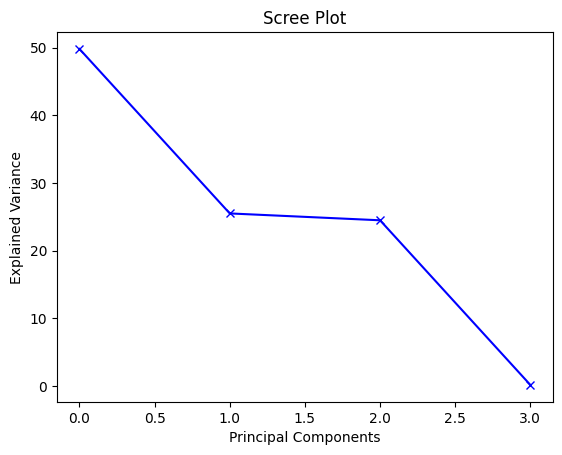

In [ ]:
#scree plot with variance
plt.plot(range(0, pca.n_components), pca.explained_variance_ratio_*100, 'bx-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()


###VARIANCE OF EACH COMPONENT

The variance of each of the principal components, as identified in part D2, represents how much of the original dataset's information (or variability) is captured by each component. Specifically:

- The first principal component explains 49.83% of the total variance in the dataset. This means that almost half of the total variability present in the original dataset can be described by this single component. The first principal component is the most informative, capturing the largest share of the patterns and trends within the data. It represents the direction in which the data varies the most and can be considered the most significant axis along which the majority of the dataset’s differences are distributed.

- The second principal component explains 25.51% of the total variance in the dataset. This component captures the next largest amount of variability, after the first component, and it is uncorrelated with the first.


In [ ]:
#PCA percentage explained for first 2 components
pca.explained_variance_ratio_[0:2] *100

array([49.82927865, 25.51199421])

In [ ]:
#obtain eigen values for pca values greater than 1
eigen_values = [value for value in pca.explained_variance_ if value > 1]
eigen_values

[1.9933704829386159, 1.0205818265582443]

In [ ]:
# Bool values for eigen values greater than 1
bool_eigen = [True if value > 1 else False for value in pca.explained_variance_]
bool_eigen

[True, True, False, False]

In [ ]:
eigen = pca.explained_variance_ratio_[0:5] *100
pca_var = [k *100 / sum(eigen) for k in eigen]

#dataframe
explaind_eigen = pd.DataFrame(pca_var[:2], columns=['% Variance'])
explaind_eigen

,% Variance
0,49.829279
1,25.511994



###TOTAL VARIANCE CAPTURED BY COMPONENTS

Together, the first and second principal components explain a combined 75.34% of the total variance in the dataset. This means that these two components are sufficient to retain a substantial portion of the original data’s information, while also reducing the dataset's complexity by summarizing it in just two dimensions. By focusing on these two components, it is possible to understand and visualize the main trends and relationships in the dataset while ignoring much of the noise or less important variations captured by subsequent components. The ability to explain such a large proportion of variance with just two principal components is one of the primary advantages of PCA—it allows for dimensionality reduction without a significant loss of information. This helps in simplifying the dataset, making it easier to analyze, interpret, and visualize. Additionally, models built using the reduced-dimensional dataset often run more efficiently and may be more robust, as the model’s complexity is reduced, which helps in mitigating the risk of overfitting. However, it’s also important to note that even though the first two components explain a majority of the variance, they do not capture all of it. The remaining variance is spread across the subsequent principal components. Depending on the context and requirements of the analysis, it may be necessary to consider additional components to ensure that the data’s key features are fully represented, especially if the goal is to retain as much of the original variability as possible.


In [ ]:
#Sum Total percentage of variance of first 2 components
sum(pca_var[:2])

75.34127285664778


###SUMMARY OF DATA ANALYSIS

The data analysis performed with Principal Component Analysis (PCA) focused on reducing the dataset's dimensionality while preserving as much of the essential information as possible. This approach is especially beneficial when dealing with complex datasets that contain multiple correlated features, as it simplifies the analysis process without losing key insights. To begin, continuous variables such as tenure, monthly_charge, outage_sec_perweek, and bandwidth_gb_year were standardized to ensure a mean of zero and unit variance. After standardizing the dataset, PCA was applied to transform the original features into new uncorrelated variables called principal components. The analysis revealed that the first two principal components captured 75.34% of the total variance:

- Principal Component 1 explained 49.83% of the variance, representing the direction with the highest variability in the dataset. This means that nearly half of the dataset's complexity can be understood through this single component, which serves as a summary of the strongest underlying relationships between the features.

- Principal Component 2 accounted for 25.51% of the variance, capturing additional variability orthogonal to the first component. The orthogonality means that this component provides unique information not covered by the first, offering new perspectives on the data’s structure.

Together, these two components account for more than three-quarters of the dataset’s variability, making it possible to reduce the dataset from its original four dimensions to just two, without significant information loss. This reduction simplifies the dataset, enabling easier analysis and interpretation of underlying trends and relationships. Dimensionality reduction also makes the data more computationally efficient for subsequent analysis, such as machine learning modeling or other statistical evaluations.

Transforming the data into two principal components has multiple benefits:

1. Simplified Visualization: By reducing the data to two dimensions, it becomes possible to visually explore the dataset in a straightforward way. Plotting these components can help reveal natural groupings, clusters, trends, or outliers that are otherwise difficult to detect in higher dimensions.

2. Improved Computational Efficiency: Reducing the number of features directly impacts the efficiency of subsequent analyses. With fewer dimensions, the computational burden is lower, which makes training models faster and less resource-intensive. This is especially helpful for large datasets, where reducing processing time can significantly accelerate the analysis workflow.

3. Reduced Risk of Overfitting: Machine learning models built on datasets with fewer features are generally less complex, which can lead to a reduced risk of overfitting. By retaining only the most informative components, models become more generalizable, improving their ability to perform well on unseen data.

Another important outcome of PCA is the ability to simplify complex relationships among features. Original datasets may have many correlated variables, leading to redundancy and making it challenging to determine the main drivers of variability. PCA eliminates this redundancy by transforming correlated variables into a set of uncorrelated components, allowing for a clearer interpretation of the data's core structure without being complicated by overlapping information. However, it is essential to note that PCA is fundamentally an exploratory tool. It provides insight into the directions of maximum variance but does not establish causality between features. The principal components are derived from linear combinations of the original variables, offering a summary of the data's variance, but they do not identify specific cause-and-effect relationships. Therefore, PCA is most effective for purposes such as feature reduction and initial exploratory analysis, where the objective is to understand key patterns and relationships rather than determine direct causation.

In conclusion, the application of PCA in this analysis successfully reduced the dimensionality of the dataset while retaining a significant portion of its variance. By capturing 75.34% of the total variability using just the first two components, PCA made the dataset more manageable for visualization, computation, and interpretation. It effectively highlighted the most critical features while reducing redundancy, providing a clearer understanding of the data's structure. Although PCA does not identify causal relationships, it remains a powerful tool for simplifying complex datasets and preparing them for further, more detailed analysis.
